1. Realizar un analisis exploratorio de los datos para identificar relaciones entre variables, valores atipicos, tendencias, etc.

In [2]:
# Cargar las librerias necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#Lectura de datos en Python y se carga en la variable datos

Datos = pd.read_csv('./car data.csv')

In [4]:
#Realizamos lectura de datos para el analisis exploratorio

Datos.head(50)

,nombre,año,Precio_Venta,Precio_Presente,Kms_Recorridos,Tipo_Combustible,Tipo_Vendedor,Transmisión,Propietario
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [5]:
#Validacion filas y columnas

Datos.shape

(301, 9)

In [6]:
#Descripción de los datos

Datos.describe()

,año,Precio_Venta,Precio_Presente,Kms_Recorridos,Propietario
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
#Filtramos datos unicos

Datos["nombre"].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [8]:
#Mostramos datos unicos por columna

print(Datos["Tipo_Combustible"].unique())
print(Datos["Tipo_Vendedor"].unique())
print(Datos["Transmisión"].unique())
print(Datos["Propietario"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [9]:
#Mostramos la primera fila

Datos.head(1)

,nombre,año,Precio_Venta,Precio_Presente,Kms_Recorridos,Tipo_Combustible,Tipo_Vendedor,Transmisión,Propietario
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [10]:
#Damos un valor numérico a cada categoria

category_mapping1 = {'Petrol': 0, 'Diesel': 1, 'CNG':2}
Datos['Tipo_Combustible'] = Datos["Tipo_Combustible"].map(category_mapping1)
category_mapping2 = {'Dealer': 0, 'Individual': 1}
Datos['Tipo_Vendedor'] = Datos['Tipo_Vendedor'].map(category_mapping2)
category_mapping3 = {'Manual': 0, 'Automatic': 1}
Datos['Transmisión']= Datos['Transmisión'].map(category_mapping3)
Datos.head()

,nombre,año,Precio_Venta,Precio_Presente,Kms_Recorridos,Tipo_Combustible,Tipo_Vendedor,Transmisión,Propietario
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

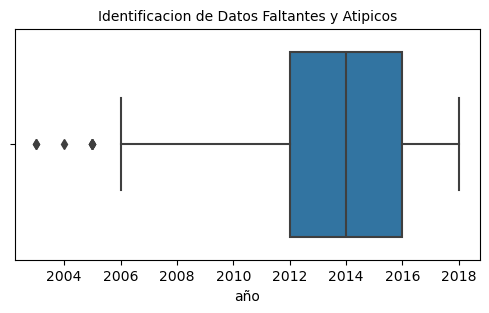

In [11]:
#Identificacion de datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['año'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

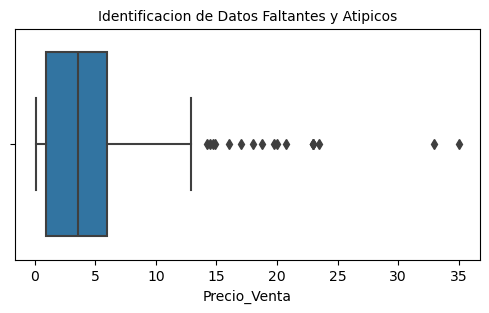

In [12]:
#Identificacion de datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Precio_Venta'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

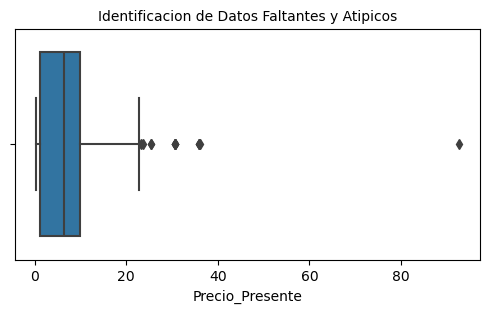

In [13]:
#Identificacion de datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Precio_Presente'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

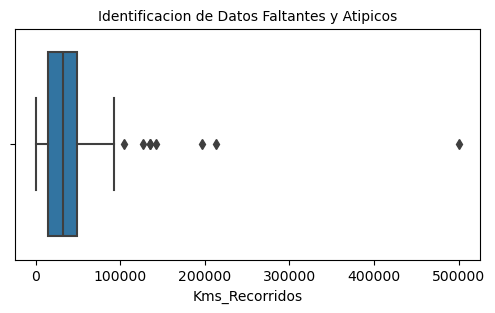

In [14]:
#Identificacion de datos faltantes y Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Kms_Recorridos'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [15]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Nombre: ",Datos['nombre'].isin([0]).sum())
print("Cantidad de Registros con cero en Año: ",Datos['año'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio Venta: ",Datos['Precio_Venta'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio Presente: ",Datos['Precio_Presente'].isin([0]).sum())
print("Cantidad de Registros con cero en Kms Recorridos: ",Datos['Kms_Recorridos'].isin([0]).sum())
print("Cantidad de Registros con cero en Tipo Combustible: ",Datos['Tipo_Combustible'].isin([0]).sum())
print("Cantidad de Registros con cero en Tipo Vendedor: ",Datos['Tipo_Vendedor'].isin([0]).sum())
print("Cantidad de Registros con cero en Transmisión: ",Datos['Transmisión'].isin([0]).sum())
print("Cantidad de Registros con cero en Propietario: ",Datos['Propietario'].isin([0]).sum())

Cantidad de Registros con cero en Nombre:  0
Cantidad de Registros con cero en Año:  0
Cantidad de Registros con cero en Precio Venta:  0
Cantidad de Registros con cero en Precio Presente:  0
Cantidad de Registros con cero en Kms Recorridos:  0
Cantidad de Registros con cero en Tipo Combustible:  239
Cantidad de Registros con cero en Tipo Vendedor:  195
Cantidad de Registros con cero en Transmisión:  261
Cantidad de Registros con cero en Propietario:  290


In [16]:
#Revision del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nombre            301 non-null    object 
 1   año               301 non-null    int64  
 2   Precio_Venta      301 non-null    float64
 3   Precio_Presente   301 non-null    float64
 4   Kms_Recorridos    301 non-null    int64  
 5   Tipo_Combustible  301 non-null    int64  
 6   Tipo_Vendedor     301 non-null    int64  
 7   Transmisión       301 non-null    int64  
 8   Propietario       301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Caracteristica de interes:

Precio del automovil: Predecir el precio del automóvil en función de sus atributos

In [17]:
#Escogemos la variable dependiente

Datos['Precio_Venta'].value_counts()

Precio_Venta
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64

In [18]:
Datos[['Precio_Venta']].head(40)

,Precio_Venta
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
5,9.25
6,6.75
7,6.50
8,8.75
9,7.45


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [19]:
#Porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25%

#Se crean variables X y Y para almacenar la información del entrenamiento

X=Datos.drop(["nombre", "Precio_Venta"],axis=1)
Y=Datos[["Precio_Venta"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [20]:
#Mostramos los datos

X.head()

,año,Precio_Presente,Kms_Recorridos,Tipo_Combustible,Tipo_Vendedor,Transmisión,Propietario
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [21]:
#Mostramos el numero de filas y de columnas para el train y el test

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(225, 7)
(225, 1)
(76, 7)
(76, 1)


In [22]:
print (X_train)

      año  Precio_Presente  Kms_Recorridos  Tipo_Combustible  Tipo_Vendedor  \
146  2014            0.787           15000                 0              1   
260  2016           13.600           29223                 0              0   
37   2003            2.280          127000                 0              1   
273  2010            7.500           61203                 0              0   
164  2016            0.540           14000                 0              1   
..    ...              ...             ...               ...            ...   
251  2013            9.900           56701                 0              0   
192  2007            0.750           49000                 0              1   
117  2015            1.900           14000                 0              1   
47   2006            4.150           65000                 0              0   
172  2014            0.640           13700                 0              1   

     Transmisión  Propietario  
146            0   

In [23]:
print (Y_train)

     Precio_Venta
146          0.55
260          9.15
37           0.35
273          2.25
164          0.45
..            ...
251          5.00
192          0.20
117          1.10
47           1.05
172          0.40

[225 rows x 1 columns]


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [24]:
#Construir el modelo de regresión logistica

modelo_linear= LinearRegression()
modelo_linear.fit(X_train, Y_train)

#Crea el modelo de predicción

Prediccion = modelo_linear.predict(X_test)

In [25]:
print(Y_test)

     Precio_Venta
223          8.25
150          0.50
226          5.25
296          9.50
52          18.00
..            ...
46           2.65
158          0.48
230          6.15
179          0.31
27           6.00

[76 rows x 1 columns]


In [26]:
print(Prediccion)

[[ 7.08116375]
 [-0.34778693]
 [ 4.39251189]
 [ 8.50523618]
 [13.59916378]
 [ 4.96959079]
 [ 3.6817552 ]
 [ 1.42213013]
 [ 5.28281471]
 [ 4.76767283]
 [ 2.45405739]
 [ 1.59177671]
 [ 5.15899397]
 [ 7.42622454]
 [ 8.12314599]
 [13.71297994]
 [ 7.19613038]
 [ 4.3895981 ]
 [-0.36980919]
 [ 2.32342099]
 [ 4.96164592]
 [ 3.92199269]
 [ 6.35380065]
 [ 8.07735211]
 [-1.7565571 ]
 [ 1.89633988]
 [-0.69665759]
 [ 0.84096003]
 [ 0.05928392]
 [ 7.05995048]
 [ 3.20015998]
 [ 6.98246085]
 [ 0.74593109]
 [ 7.43831094]
 [ 3.74052139]
 [ 1.78220493]
 [ 5.64275408]
 [ 6.53617338]
 [-2.53755306]
 [ 8.62434016]
 [ 8.66353145]
 [19.12602755]
 [ 4.48980405]
 [ 3.9915907 ]
 [ 6.22763143]
 [ 9.33204033]
 [ 0.17817227]
 [ 1.65724807]
 [ 5.26152047]
 [ 6.88559389]
 [ 7.93197487]
 [ 4.29247302]
 [ 5.02356072]
 [19.46935113]
 [ 1.73738094]
 [ 1.31403762]
 [ 0.33219424]
 [ 2.21678119]
 [ 3.57229229]
 [ 0.87053628]
 [ 3.77228163]
 [ 6.40821944]
 [ 2.74947891]
 [20.52433162]
 [ 4.43996868]
 [ 5.6658022 ]
 [ 8.63021

6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-Score, etc

In [33]:
#Desempeño del modelo de regresión

print('El Error Absoluto Medio del Modelo es:', metrics.mean_absolute_error(Y_test, Prediccion))
print('El Error Cuadrático Medio del Modelo es:', metrics.mean_squared_error(Y_test, Prediccion))
print('El error Cuadrático Medio del Modelo es:', np.sqrt(metrics.mean_squared_error(Y_test, Prediccion)))

El Error Absoluto Medio del Modelo es: 1.187584654493083
El Error Cuadrático Medio del Modelo es: 4.412085540681566
El error Cuadrático Medio del Modelo es: 2.10049649861207


In [31]:
X_train.head(1)

,año,Precio_Presente,Kms_Recorridos,Tipo_Combustible,Tipo_Vendedor,Transmisión,Propietario
146,2014,0.787,15000,0,1,0,0


7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

Text(0, 0.5, 'Prediccion')

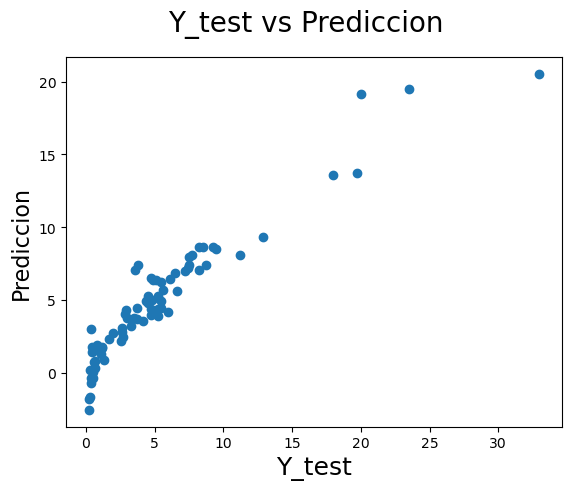

In [35]:
#Trazado de Y_test y Prediccion para comprender la dispersión.

fig = plt.figure()
plt.scatter(Y_test,Prediccion)
fig.suptitle('Y_test vs Prediccion', fontsize=20)
plt.xlabel('Y_test', fontsize=18)
plt.ylabel('Prediccion', fontsize=16)